In [8]:
import pandas as pd
df = pd.read_csv("/content/diabetes_pima.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
import numpy as np
df['Outcome'] = np.where(df['Outcome']==1,'Yes','No')

In [ ]:
import seaborn as sns
sns.pairplot(df,hue='Outcome')

In [9]:
x = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [12]:
xtrain = torch.FloatTensor(xtrain)
xtest = torch.FloatTensor(xtest)
ytrain = torch.LongTensor(ytrain)
ytest = torch.LongTensor(ytest)

In [16]:
class ann_model(nn.Module):
  def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
    super().__init__()
    self.f_connected1 = nn.Linear(input_features,hidden1)
    self.f_connected2 = nn.Linear(hidden1,hidden2)
    self.out = nn.Linear(hidden2,out_features)
  def forward(self,x):
    x = F.relu(self.f_connected1(x))    
    x = F.relu(self.f_connected2(x))
    x = self.out(x)
    return x

In [17]:
torch.manual_seed(20)
model = ann_model()

In [19]:
model.parameters()

<generator object Module.parameters at 0x7f53a4bfc888>

In [20]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
epochs = 500
final_losses = []
for i in range(epochs):
  i+=1
  ypred = model.forward(xtrain)
  loss = loss_function(ypred,ytrain)
  final_losses.append(loss)
  if i%10==1:
    print("Epoch number:{} loss:{}".format(i,loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [22]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'epochs')

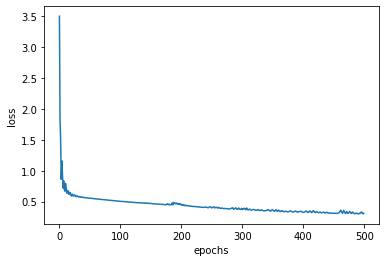

In [23]:
plt.plot(range(epochs),final_losses)
plt.ylabel("loss")
plt.xlabel("epochs")

In [31]:
predictions = []
with torch.no_grad():
  for i,data in enumerate(xtest):
    ypred = model(data)
    predictions.append(ypred.argmax().item())

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(ytest,predictions))
confusion_matrix(ytest,predictions)

0.7186147186147186


array([[128,  23],
       [ 42,  38]])

In [35]:
torch.save(model,'diabetes.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type ann_model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [37]:
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [39]:
lst1 = [6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [40]:
new_data = torch.tensor(lst1)

In [42]:
with torch.no_grad():
  print(model(new_data))
  print(model(new_data).argmax().item())

tensor([3.1674, 0.4480])
0
